<a href="https://colab.research.google.com/github/CoweiChou/OpenAI/blob/main/OpenAI_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai
!pip install python-dotenv

In [5]:
import openai
from dotenv import dotenv_values
config = dotenv_values(".env")
# config["API_KEY"]

In [6]:
openai.api_key = config["API_KEY"]

## 根據 prompt 輸入給予顏色

In [12]:
import os
import openai
import json

def generate_colors(text):
    prompt_color = f"""
        根據以下文字產生2到6個顏色

        輸出格式：python列表, 16進制顏色編碼

        ###
        google
        ###
        ["#000000",]

        ###
        {text}
        ###

    """

    response = openai.Completion.create(
    model="text-davinci-003",
    prompt= prompt_color,
    temperature=1,
    max_tokens=100,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0
    )

    colors = json.loads(response["choices"][0]["text"])

    html = ""
    for i in colors:
        html += f"<div style='background-color:{i}'>{i}</div>"
    return html

In [ ]:
!pip install gradio

In [13]:
import gradio as gr

demo = gr.Interface(
        fn = generate_colors,
        inputs = "text",
        outputs = "html",
        title = "顏色產生器",
        description = "輸入一段文字，產生2~6個顏色",
        allow_flagging= "never"

)

demo.launch()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [16]:
colors_html = generate_colors("facebook")

from IPython.display import HTML
display(HTML(colors_html))


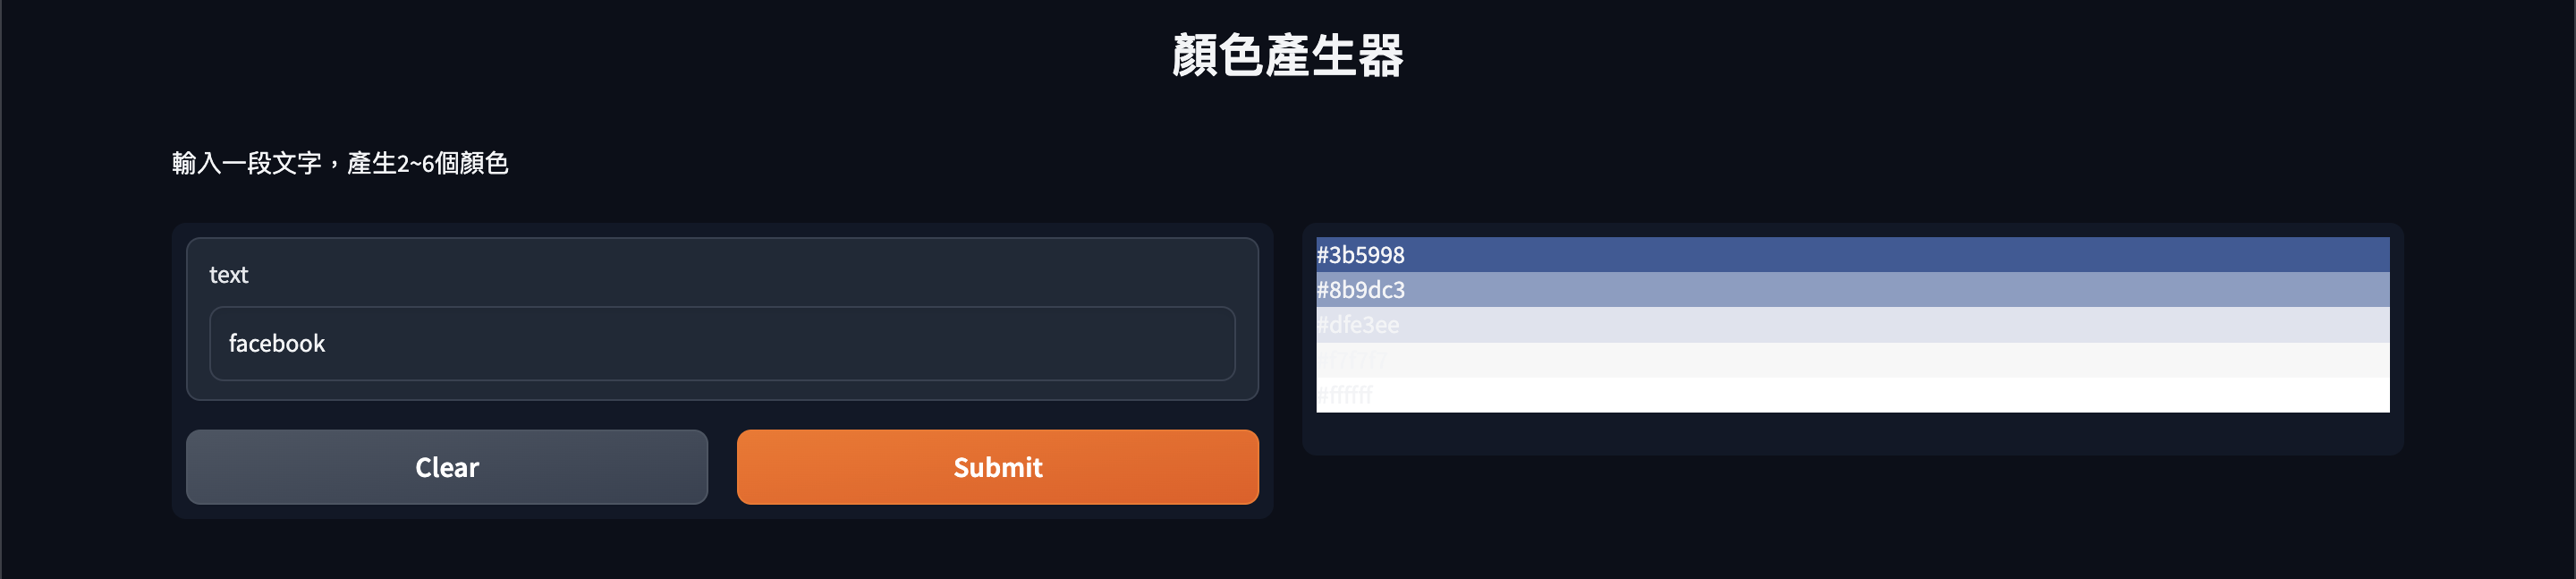

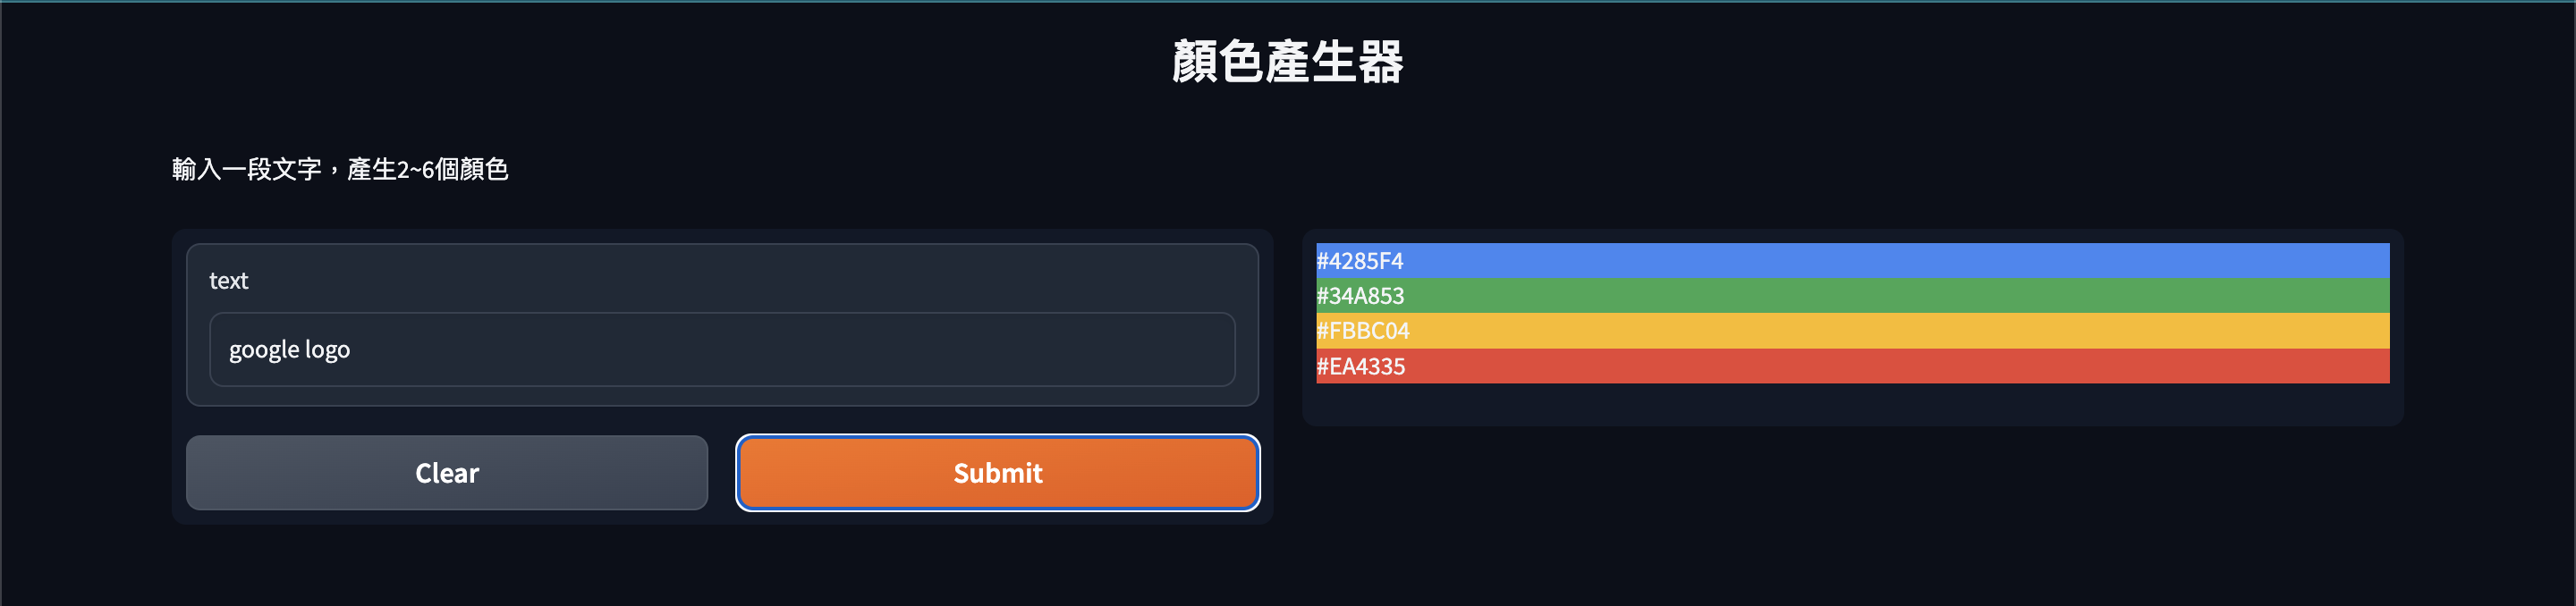